## Load Library

In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In this dataset, each entry represents a person who takes a credit by a bank

In [435]:
data = pd.read_csv('german_credit_data.csv')

In [436]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [437]:
#Drop kolom Unnamed: 0 karena itu index
data.drop(columns='Unnamed: 0', inplace=True)

## Cari tahu lebih dalam tentang data kita

1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [438]:
data.shape

(1000, 9)

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [440]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [441]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## Handling Missing Values

In [442]:
#Ada 2 kolom yang beberapa datanya missing
count_missing = data.isnull().sum()
count_missing

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [443]:
#Persentase kolom yang datanya kosong
percentage = round(count_missing/len(data)*100,2)
percentage

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

### Fill the misiing values
1. Saving accounts fill with data mode karena kategorikal
2. Checking acccount fill with data mode karena kategorikal

In [444]:
features = ['Saving accounts', 'Checking account']

In [445]:
for feature in features:
    if feature in data.columns.values:
        data[feature] = data[feature].fillna(data[feature].value_counts().index[0])

In [446]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [447]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

## Exploratory Data Analysis (Univariate)

In [448]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [449]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


### Cari tahu yuk distribusi dari umur yang mengambil credit di bank

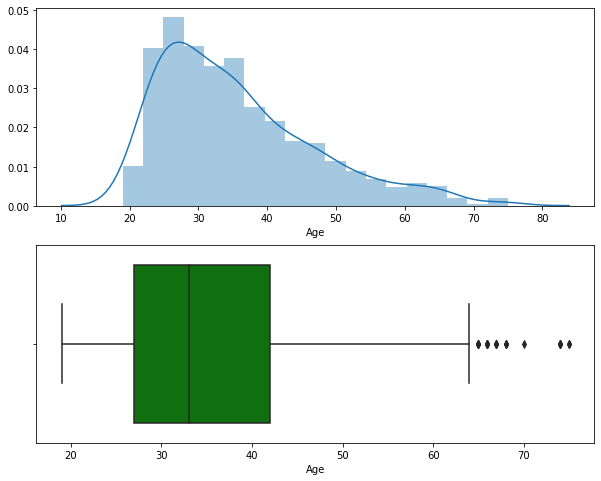

In [450]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(data['Age'])

f.add_subplot(2,1,2)
sns.boxplot(data['Age'], color='green')

1. dari 2 plot diatas dapat diambil insights bahwa sebagian besar yang mengambil kredit di bank adalah orang yang berumur diantara 27 - 42 tahun. mungkin ini adalah orang yang baru menikah dan membutuhkan pinjaman dari bank.
<br>
2. umur dibawah 20 tahun sangat sedikit yang mengambil credit karena memang mungkin mereka masih muda dan financial mereka masih disokong oleh orang tua mereka.
<br>
3. sedangkan untuk umur diatas 50 tahun juga relatif sedikit yang mengambil kredit, mungkin karena di umur ini orang sudah mapan.

### Apakah perbedaan gender berpengaruh ?

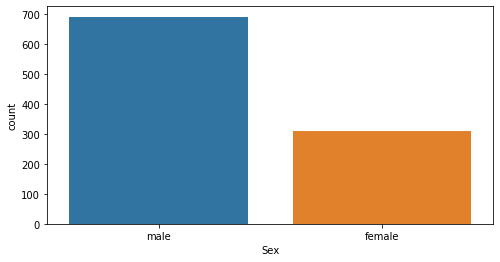

In [451]:
plt.figure(figsize=(8,4))
sns.countplot(data['Sex'])

ternyata laki laki lebih banyak mengambil kredit daripada perempuan.

### Bagaimana hubunganya dengan housing dan job ?

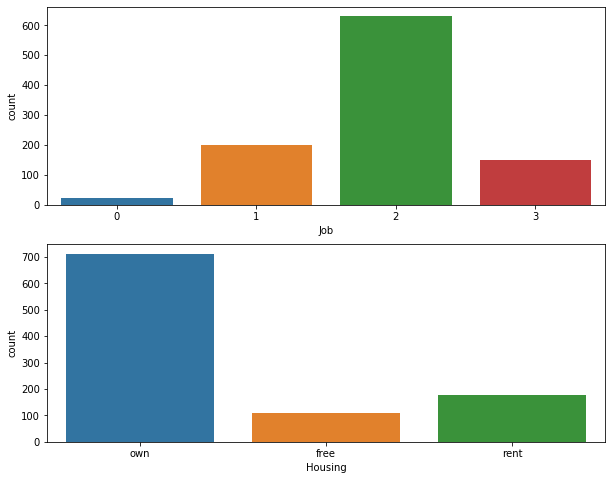

In [452]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.countplot(data['Job'])

f.add_subplot(2,1,2)
sns.countplot(data['Housing'])

dilihat dari grafik diatas:
1. ternyata paling banyak yang meminjam credit adalah yang jobnya tipe skilled dan yang sudah memiliki rumah
<br>
2. apakah memang bank hanya memberikan credit terhadap penduduk yang jobnya skilled dan memiliki rumah ? karena bank percaya mereka akan bisa mengembalikan uang pinjaman. atau hanya penduduk yang seperti di atas yang berani meminjam uang ?

### Lalu bagaimana dengan distribusi dari jumlah pinjaman ?

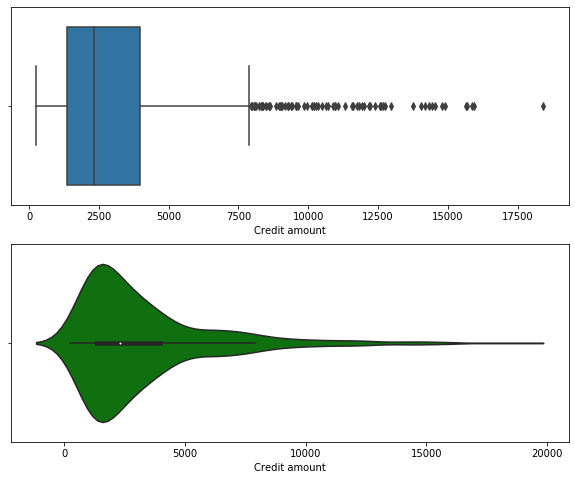

In [453]:
g = plt.figure(figsize=(10,8))

g.add_subplot(2,1,1)
sns.boxplot(data['Credit amount'])

g.add_subplot(2,1,2)
sns.violinplot(data['Credit amount'], color='green')

1. dari boxplot bisa dilihat bahwa ternyata banyak sekali data outlier.
2. dari keduaplot bisa diketahui bahwa sebagian besar orang meminjam uang dari bank dengan nilai diantara 2000 - 3800 us dollars
3. distribusi data lebih ke Right Skewed

### Duration, saya mencernanya ini itu berapa lama orang akan melunasi creditnya

In [454]:
top_duration = data.groupby('Duration').Age.count().reset_index()
top_duration.rename(columns={'Age':'count'}, inplace=True)
top_duration = top_duration.nlargest(50, 'count')

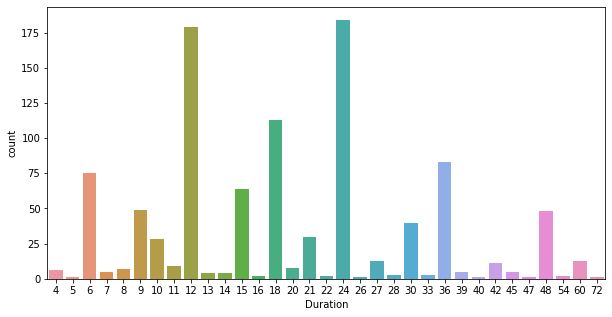

In [455]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_duration, y=top_duration['count'], x=top_duration['Duration'])

sebagian besar orang memilih untuk melunasi kredit dengan jangka waktu 24 bulan dan 12 bulan.

### Untuk apa saja mereka meminjam kredit ?

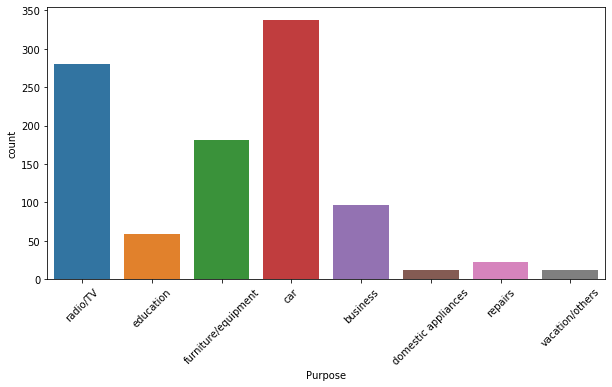

In [525]:
plt.figure(figsize=(10,5))
plot = sns.countplot(data['Purpose'])
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

Ternyata rata-rata orang meminjam kredit untuk memenuhi kebutuhan tersier seperi membeli mobil / radio dan tv

### coba kita cari tahu tentang saving accounts dan checking accounts

In [457]:
data['Saving accounts'].unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [458]:
data['Checking account'].unique()

array(['little', 'moderate', 'rich'], dtype=object)

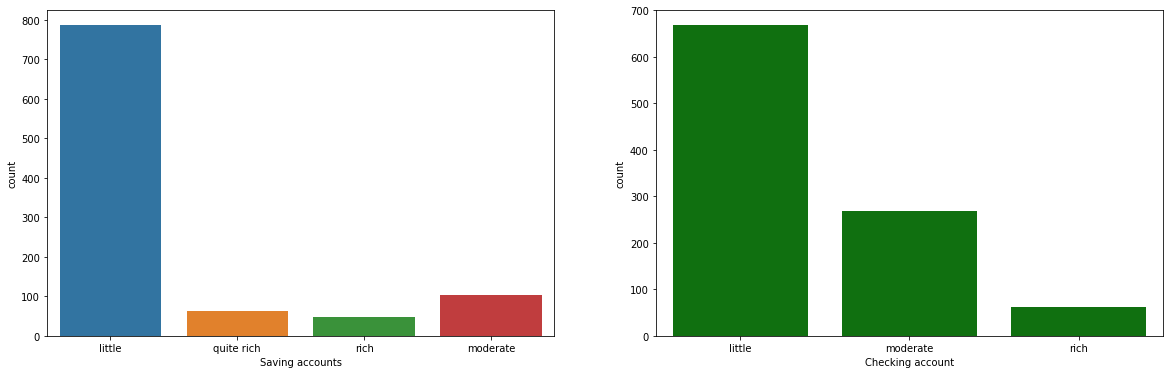

In [459]:
h = plt.figure(figsize=(20,6))

h.add_subplot(1,2,1)
sns.countplot(data['Saving accounts'])

h.add_subplot(1,2,2)
sns.countplot(data['Checking account'], color='green')

ternyata memang sebagian besar orang yang meminjam di bank adalah yang mempunya saving and checking account yang sedikit

## Exploratory Data Analysis (Bivariate)

In [460]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

### Mengubah data kategorikal ke numerikal dengan label encoder

In [461]:
kategorikal = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [462]:
data2 = data.copy()

In [463]:
for feature in kategorikal:
    if feature in data2.columns.values:
        data2[feature] = LabelEncoder().fit_transform(data2[feature])

In [464]:
data2.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


### Korelasi plot

In [465]:
data2[kategorikal].corr(method='spearman').style.background_gradient().set_precision(2) #untuk data kategorik

,Sex,Housing,Saving accounts,Checking account,Purpose
Sex,1,-0.22,-0.006,-0.014,-0.055
Housing,-0.22,1,0.045,-0.023,0.0087
Saving accounts,-0.006,0.045,1,0.049,-0.032
Checking account,-0.014,-0.023,0.049,1,0.0098
Purpose,-0.055,0.0087,-0.032,0.0098,1


In [466]:
data.corr(method='pearson').style.background_gradient().set_precision(2) #untuk data numerikal

,Age,Job,Credit amount,Duration
Age,1,0.016,0.033,-0.036
Job,0.016,1,0.29,0.21
Credit amount,0.033,0.29,1,0.62
Duration,-0.036,0.21,0.62,1


In [467]:
data2.corr(method='pearson').style.background_gradient().set_precision(2) #untuk semua data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
Age,1,0.16,0.016,-0.3,0.016,-0.027,0.033,-0.036,-0.074
Sex,0.16,1,0.07,-0.22,-0.014,-0.013,0.093,0.081,-0.063
Job,0.016,0.07,1,-0.11,-0.035,-0.043,0.29,0.21,-0.025
Housing,-0.3,-0.22,-0.11,1,0.043,-0.028,-0.14,-0.16,0.021
Saving accounts,0.016,-0.014,-0.035,0.043,1,0.016,-0.078,-0.043,-0.025
Checking account,-0.027,-0.013,-0.043,-0.028,0.016,1,0.007,0.0042,0.019
Credit amount,0.033,0.093,0.29,-0.14,-0.078,0.007,1,0.62,-0.15
Duration,-0.036,0.081,0.21,-0.16,-0.043,0.0042,0.62,1,-0.083
Purpose,-0.074,-0.063,-0.025,0.021,-0.025,0.019,-0.15,-0.083,1


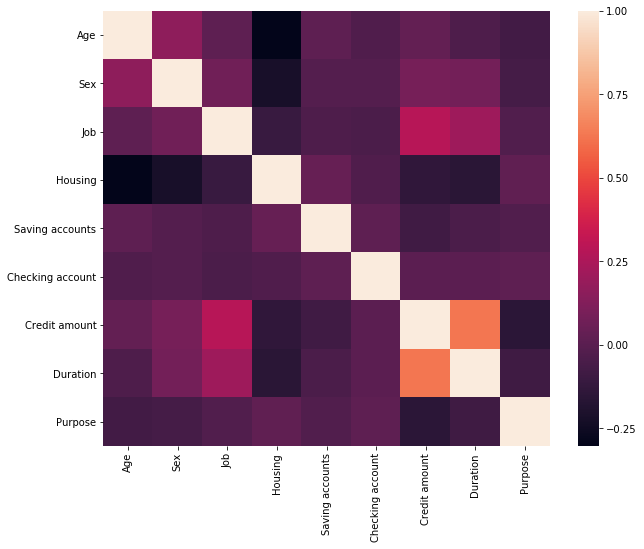

In [468]:
plt.figure(figsize=(10,8))
sns.heatmap(data2.corr(method='pearson'))

### Hubungan antara Job dengan Credit Amount, Job dengan Duration

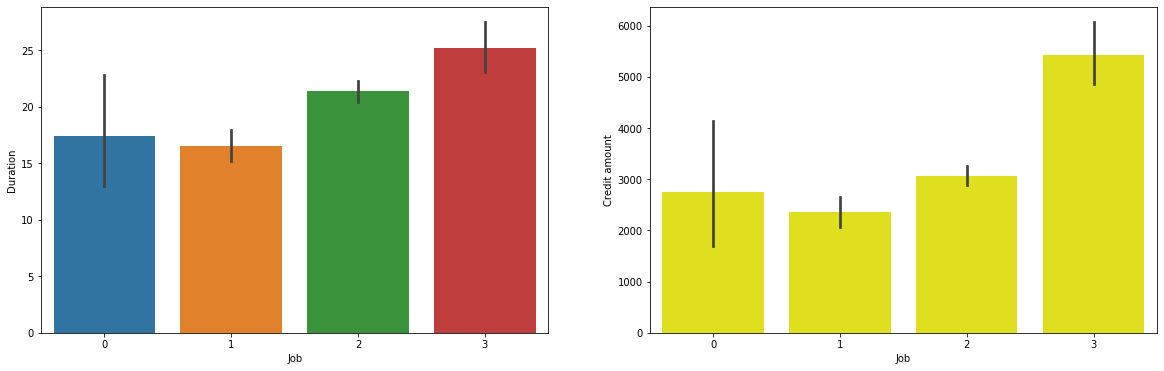

In [469]:
i = plt.figure(figsize=(20,6))

i.add_subplot(1,2,1)
sns.barplot(data['Job'], data['Duration'])

i.add_subplot(1,2,2)
sns.barplot(data['Job'], data['Credit amount'], color='yellow')

1. ternyata ada korelasi positif tetapi tidak terlalu kuat antara job dengan durasi pinjam dan job dengan jumlah kredit yang dipinjam.
2. jadi dengan bertambahnya nilai job atau semakin skillfull orang maka dia berani untuk meminjam kredit lebih besar

### Hubungan antara Duration dengan Credit Amount, Purpose dengan Credit amount, Housing dengan credit amount

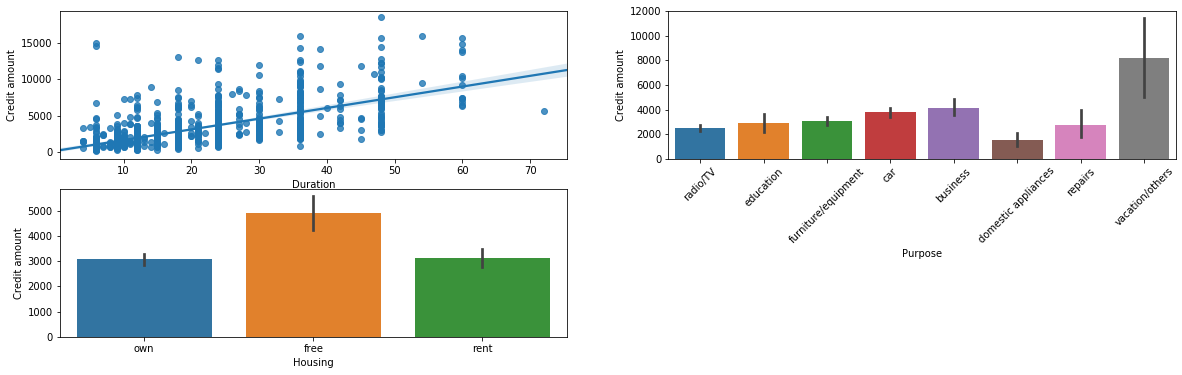

In [470]:
j = plt.figure(figsize=(20,6))

j.add_subplot(2,2,1)
sns.regplot(data['Duration'], data['Credit amount'])

j.add_subplot(2,2,2)
plot = sns.barplot(data['Purpose'], data['Credit amount'])
plt.setp(plot.get_xticklabels(), rotation=45)

j.add_subplot(2,2,3)
sns.barplot(data['Housing'], data['Credit amount'])

plt.show()
f.tight_layout()

1. untuk korelasi antara duration dengan credit amount adalah positif yang kuat. dimana dengan bertambahnya durasi pengembalian kredit maka orang akan lebih berani untuk meminjam kredit yang lebih besar
2. ternyata walaupun banyak orang yang meminjam kredit untuk vacation, namun rata-rata jumlah kredit untuk vacation adalah yang terbesar. jadi ada kemungkinan bahwa per orang berani meminjam lebih besar kredit untuk vacation
3. untuk yang memiliki rumah, semakin dia memiliki rumah maka semakin kecil pula rata-rata uang yang mereka pinjam

### Hubungan antara usia dengan gender, gender dengan credit amount, gender dengan duration

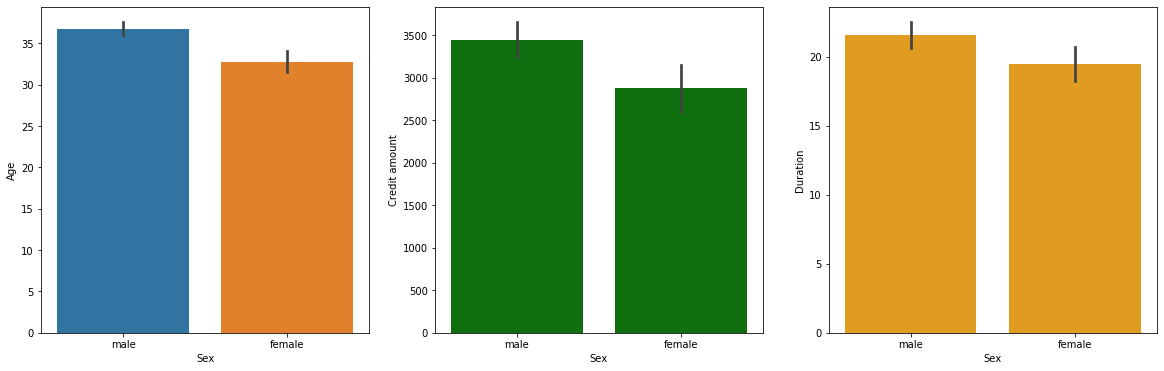

In [471]:
k = plt.figure(figsize=(20,6))

k.add_subplot(1,3,1)
sns.barplot(data['Sex'], data['Age'])

k.add_subplot(1,3,2)
sns.barplot(data['Sex'], data['Credit amount'], color='green')

k.add_subplot(1,3,3)
sns.barplot(data['Sex'], data['Duration'], color='orange')

dari 3 grafik diatas dapat ditarik insight:
1. sebagian besar laki-laki yang meminjam kredit lebih tua daripada dengan wanita.
2. laki laki lebih berani untuk meminjam kredit lebih banyak daripada perempuan
3. durasi peminjaman rata-rata oleh laki-laki lebih lama daripada wanita
<br>
sepertinya laki-laki lebih berani dari wanita yak

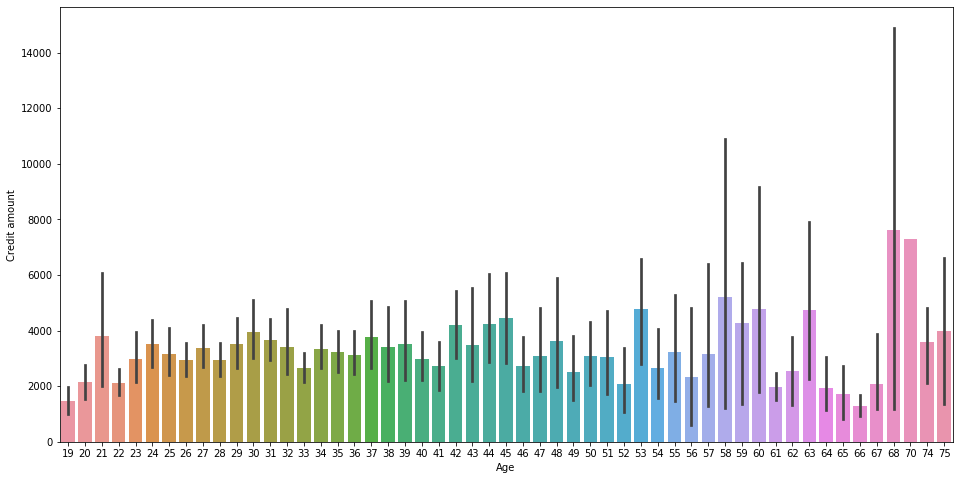

In [472]:
plt.figure(figsize=(16,8))
sns.barplot(data['Age'], data['Credit amount'])

dapat dilihat bahwa memang sebagian besar kelompok umur meminjam uangnya dibawah 4000 us dollars

## Clustering

## Clustering

## Clustering

## Clustering

In [473]:
data2.corr(method='pearson').style.background_gradient().set_precision(2) #untuk semua data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
Age,1,0.16,0.016,-0.3,0.016,-0.027,0.033,-0.036,-0.074
Sex,0.16,1,0.07,-0.22,-0.014,-0.013,0.093,0.081,-0.063
Job,0.016,0.07,1,-0.11,-0.035,-0.043,0.29,0.21,-0.025
Housing,-0.3,-0.22,-0.11,1,0.043,-0.028,-0.14,-0.16,0.021
Saving accounts,0.016,-0.014,-0.035,0.043,1,0.016,-0.078,-0.043,-0.025
Checking account,-0.027,-0.013,-0.043,-0.028,0.016,1,0.007,0.0042,0.019
Credit amount,0.033,0.093,0.29,-0.14,-0.078,0.007,1,0.62,-0.15
Duration,-0.036,0.081,0.21,-0.16,-0.043,0.0042,0.62,1,-0.083
Purpose,-0.074,-0.063,-0.025,0.021,-0.025,0.019,-0.15,-0.083,1


### Feature Selection

In [474]:
#Clustering akan menggunakan 3 features yaitu age, credit amount dan duration peminjaman
data3 = data[['Age', 'Credit amount', 'Duration']]
data3.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


- Setelah mendapatkan 3 features tsb, saya akan membuat fitur baru yaitu pay off power yaitu kemampuan seseorang untuk melunasi credit setiap bulanya.
- rumusnya adalah credit amount dibagi dengan duration
- jadi semisal seorang customer memiliki pay off power sebesar 100, maka dia memiliki kemampuan untuk membayar credit sebesar 100$ setiap bulanya.
- Analisis saya mengatakan bahwa semakin tinggi pay off power maka akan semakin bagus customer karena dia mampu membayar credit lebih tinggi per bulanya.

In [475]:
#Buat fitur baru pay off power
data3['Pay off power'] = (data3['Credit amount']/data3['Duration'])
data3.head()

,Age,Credit amount,Duration,Pay off power
0,67,1169,6,194.833333
1,22,5951,48,123.979167
2,49,2096,12,174.666667
3,45,7882,42,187.666667
4,53,4870,24,202.916667


In [476]:
#Feature final yang akan saya pakai adalah Age dan pay off power
data4 = data3[['Age', 'Pay off power']]
data4.head()

,Age,Pay off power
0,67,194.833333
1,22,123.979167
2,49,174.666667
3,45,187.666667
4,53,202.916667


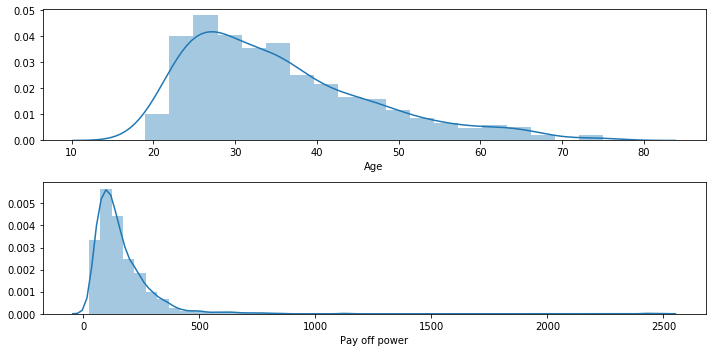

In [477]:
#Coba kita lihat distribusi dari kedua features
f = plt.figure(figsize=(10,5))

f.add_subplot(2,1,1)
sns.distplot(data4['Age'])

f.add_subplot(2,1,2)
sns.distplot(data4['Pay off power'])

f.tight_layout()

- Karena distribusi data termasuk ke dalam right skew, maka kita akan melakukan transformasi logaritmik agar persebaran data lebih baik

In [478]:
data_log = np.log(data4)

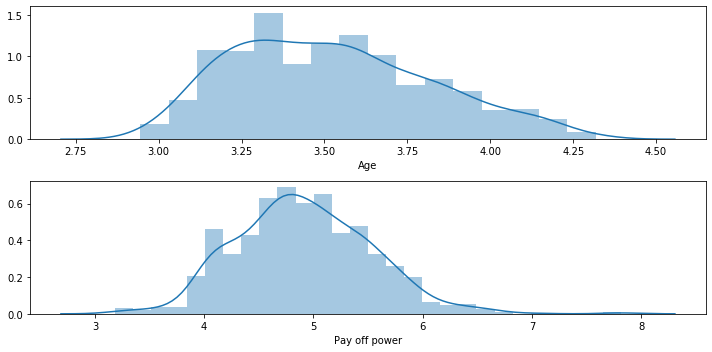

In [479]:
#Cek ulang distribusi dari kedua features
f = plt.figure(figsize=(10,5))

f.add_subplot(2,1,1)
sns.distplot(data_log['Age'])

f.add_subplot(2,1,2)
sns.distplot(data_log['Pay off power'])

f.tight_layout()

- oke distribusi data sudah bagus, kita lanjutkan ke tahapan berikutnya yaitu standarisasi data
- Karena age dan pay off power memiliki satuan yang berbeda, maka kita perlu menstandarisasi keduanya
- metode yang saya gunakan adalah minmaxscalar

In [480]:
minmax = MinMaxScaler()
data_fix = minmax.fit_transform(data_log)

## Clustering with KMeans

In [481]:
#Mencari nilai K yang optimal
inertia = []
sil = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_fix)
    km.labels_
    
    inertia.append(km.inertia_)
    sil.append(silhouette_score(data_fix, km.labels_))

Text(0, 0.5, 'Silhoutte Score')

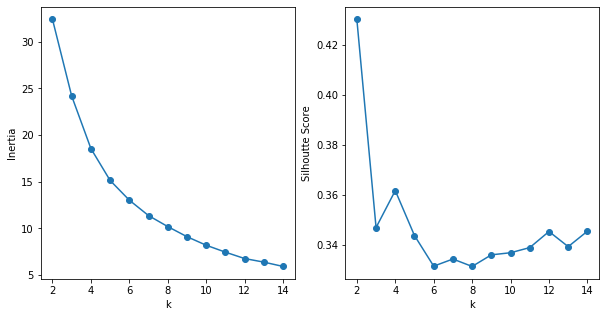

In [482]:
#Plotting dengan menggunakan inertia dan silhoute score

f = plt.figure(figsize=(10,5))

f.add_subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')

f.add_subplot(1,2,2)           
plt.plot(K, sil, marker='o')
plt.xlabel('k')
plt.ylabel('Silhoutte Score')

- Sepertinya nilai K paling bagus adalah 2, namun karena instruksinya minimal menggunakan nilai K=3 maka saya set K=4
- Silhoute score K=4 adalah sekitar 0.36

In [483]:
km = KMeans(n_clusters=4)
km = km.fit(data_fix)
km.cluster_centers_

array([[0.19848745, 0.34896188],
       [0.74864912, 0.3589879 ],
       [0.45876282, 0.53814022],
       [0.44649037, 0.29151529]])

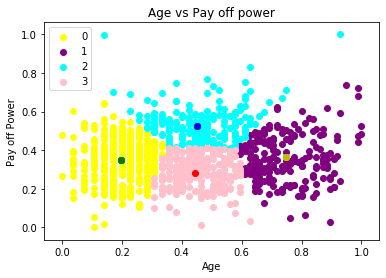

In [484]:
#Visualisasi hasil clustering dan centroidnya
x = data_fix[:,0]
y = data_fix[:,1]

group = km.labels_

colors = ['yellow', 'purple', 'cyan', 'pink']
fig, ax = plt.subplots()

for g in set(km.labels_):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, c=colors[g], label=g)
    ax.scatter(0.44474072, 0.28210597, c='r')
    ax.scatter(0.74786445, 0.3653887, c='y')
    ax.scatter(0.45208791, 0.5235049, c='b')
    ax.scatter(0.19786432, 0.34906128, c='g')
    plt.xlabel('Age')
    plt.ylabel('Pay off Power')
    plt.title('Age vs Pay off power')

ax.legend()
plt.show()

- Dengan menggunakan 4 cluster, didapatkan visualisasi seperti gambar diatas.
- Cluster 0 dengan warna kuning yang berada di tengah bawah
- Cluster 1 berwarna ungu yang berada di sisi kanan
- Cluster 2 berwarna biru yang berada di sisi tengah atas
- Cluster 3 Berwarna pink yang berwarna disisi kiri

In [485]:
#Kita coba kembalikan data menjadi satuan awal
labels = pd.DataFrame(km.labels_)
cols = ['Age', 'Pay off power']
cluster_data = data4.loc[:,cols]
clustered_data = cluster_data.assign(Cluster=labels)
clustered_data.head()

,Age,Pay off power,Cluster
0,67,194.833333,1
1,22,123.979167,0
2,49,174.666667,1
3,45,187.666667,1
4,53,202.916667,1


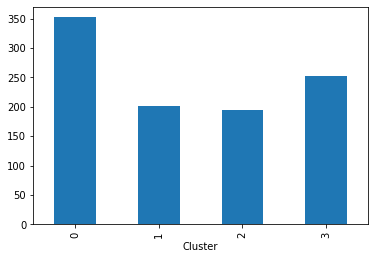

In [486]:
#Mengelompokan berdasarkan cluster
clustered_data.groupby('Cluster').size().plot.bar()

- Ternyata kluster 1 mendominasi disusul dengan kluster 3
- Kluster 0 dan 2 hampir sama jumlahnya

In [487]:
#Mengelompokan berdasarkan cluster
clustered_data.groupby('Cluster').mean().round(0)

,Age,Pay off power
Cluster,,
0,25.0,137.0
1,54.0,150.0
2,36.0,330.0
3,35.0,99.0


- Klasifikasi Age:
    1. 15 <= Age < 30 = Umur Muda
    2. 30 <= Age < 45 = Umur Sedang
    3. Age >= 45 = Umur Tua
- Klasifikasi Pay off power:
    1. 0 <= Pay < 150 = Weak power
    2. 150 <= Pay < 300 = Moderate Power
    3. Pay >= 300 = Strong Power

Dari KMeans dapat diambil insights:
1. Terdapat 4 kluster yaitu kluster 0,1,2, dan 3.
2. Kluster 2 atau merupakan segment 'SAFE' merupakan kluster dengan umur rata rata berada di sedang dan rata rata pay off powernya tinggi. Customer seperti ini biasanya para eksekutif muda yang karirnya baru naik daun. Kemungkinan besar cluster ini pasti bisa untuk membayar/melunasi credit.
3. Kluster 1 atau merupakan segment 'GOOD' merupakan kluster dengan umur rata rata yang sudah tua dengan rata rata pay off power yang moderate. Biasanya customer seperti ini merupakan pekerja kantor yang hampir pensiun.
4. Kluster 0 atau merupakan segment 'MODERATE' merupakan kluster yang masih bisa dihandalkan untuk membayar credit karena rata rata umur masih muda dan rata rata pay off power yang moderate.
5. Kluster 3 atau merupakan segment 'RISK' merupakan kluster yang paling berbahaya karena rata rata umur mereka sedang namun memiliki rata rata pay off power yang weak

## Clustering with Hierarchical Clustering

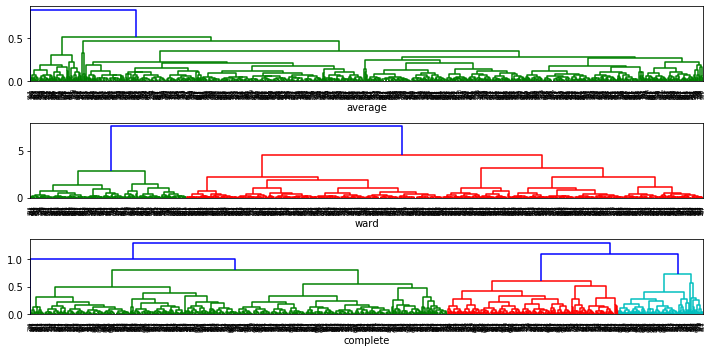

In [488]:
f = plt.figure(figsize=(10,5))

f.add_subplot(3,1,1)
dendogram1 = sch.dendrogram(sch.linkage(data_fix, method='average'))
plt.xlabel('average')

f.add_subplot(3,1,2)
dendogram2 = sch.dendrogram(sch.linkage(data_fix, method='ward'))
plt.xlabel('ward')

f.add_subplot(3,1,3)
dendogram3 = sch.dendrogram(sch.linkage(data_fix, method='complete'))
plt.xlabel('complete')

f.tight_layout()

- Dari dendogram diatas saya mengambil method yang complete dan dapat ditarik kesimpulan bahwa nilai Clusternya adalah 3 ditandai dengan warna cluster biru, merah, dan biru

In [489]:
#Mencari metode Linkage yang paling Optimal
features = ['complete', 'ward', 'average']
for feature in features:
    hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=feature)
    hc.fit(data_fix)
    labels = hc.labels_
    print(f'Linkage {feature} mempunyai score {silhouette_score(data_fix, labels)}')

Linkage complete mempunyai score 0.37218633902936854
Linkage ward mempunyai score 0.30198211933674646
Linkage average mempunyai score 0.3950909316089284


- Linkage yang paling optimal dengan melihat silhoutte score adalah average dengan score 0.395, namun setelah saya coba semua linkage, saya mendapatkan segemntasi yang paling optimal menggunakan linkage Ward
- Jadi saya memutuskan untuk menggunakan linkage Ward

In [490]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc.fit(data_fix)
labels = hc.labels_

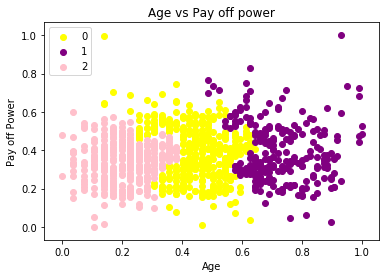

In [491]:
#Visualisasi untuk clustering
x = data_fix[:,0]
y = data_fix[:,1]

group = hc.labels_

colors = ['yellow', 'purple', 'pink', 'cyan']
fig, ax = plt.subplots()

for g in set(hc.labels_):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, c=colors[g], label=g)
    plt.xlabel('Age')
    plt.ylabel('Pay off Power')
    plt.title('Age vs Pay off power')
ax.legend()
plt.show()

- Dengan menggunakan 3 cluster, didapatkan visualisasi seperti gambar diatas.
- Cluster 0 dengan warna kuning yang berada di tengah
- Cluster 1 berwarna ungu yang berada di sisi kanan
- Cluster 2 Berwarna pink yang berwarna di sisi kiri

In [492]:
#Kita coba kembalikan data menjadi satuan awal
labels = pd.DataFrame(hc.labels_)
cols = ['Age', 'Pay off power']
cluster_data2 = data4.loc[:,cols]
clustered_data2 = cluster_data2.assign(Cluster=labels)
clustered_data2.head()

,Age,Pay off power,Cluster
0,67,194.833333,1
1,22,123.979167,2
2,49,174.666667,1
3,45,187.666667,0
4,53,202.916667,1


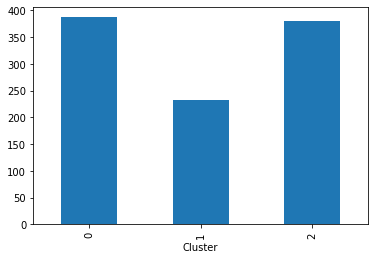

In [493]:
#Mengelompokan berdasarkan cluster
clustered_data2.groupby('Cluster').size().plot.bar()

- Cluster 0 dan 2 mendominasi

In [494]:
#Mengelompokan berdasarkan cluster
clustered_data2.groupby('Cluster').mean().round(0)

,Age,Pay off power
Cluster,,
0,35.0,182.0
1,52.0,203.0
2,26.0,132.0


- Klasifikasi Age:
    1. 15 <= Age < 30 = Umur Muda
    2. 30 <= Age < 45 = Umur Sedang
    3. Age >= 45 = Umur Tua
- Klasifikasi Pay off power:
    1. 0 <= Pay < 150 = Weak power
    2. 150 <= Pay < 300 = Moderate Power
    3. Pay >= 300 = Strong Power

Dari Hierarchical dapat diambil insights:
1. Terdapat 3 kluster yaitu kluster 0,1, dan 2.
2. Kluster 1 atau merupakan segment 'GOOD' merupakan kluster dengan rata rata umur tua dan rata rata pay off powernya moderate. Customer seperti ini biasanya para eksekutif tua yang akan pensiun. Kemungkinan besar cluster ini pasti bisa untuk membayar/melunasi credit.
3. Kluster 0 atau merupakan segment 'MODERATE' merupakan kluster dengan umur yang sedang dengan pay off power yang moderate. Biasanya customer seperti ini merupakan pekerja kantor yang sedang meniti karir.
3. Kluster 2 atau merupakan segment 'RISK' merupakan kluster yang paling berbahaya karena umur mereka masih mude dan memiliki pay off power yang weak.

## Clustering dengan DBSCAN

In [516]:
#Mencari nilai eps dan min_samples yang mengoptimalkan nilai solhoute score DBSCAN
sc = 9999999
for i in np.arange(0.1, 0.5, 0.005):
    for j in range(5,30):
        dbscan = DBSCAN(eps=i, min_samples=j)
        model = dbscan.fit(data_fix)
        label = model.labels_
        try:
            err = silhouette_score(data_fix, label)
        except:
            continue
        if sc > err:
            sc = err
            best_i = i
            best_j = j
print(best_i,best_j,sc)

0.1 29 0.40864911743813737


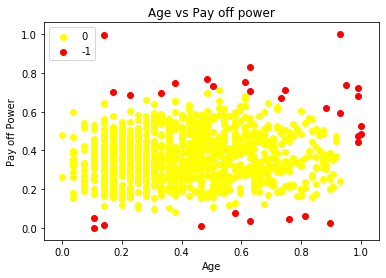

In [518]:
#Visualisasi untuk clustering
dbscan = DBSCAN(eps=0.1, min_samples=29)
model = dbscan.fit(data_fix)
label = model.labels_

x = data_fix[:,0]
y = data_fix[:,1]

group = label

colors = ['yellow', 'purple', 'pink', 'cyan', 'red']
fig, ax = plt.subplots()

for g in set(label):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, c=colors[g], label=g)
    plt.xlabel('Age')
    plt.ylabel('Pay off Power')
    plt.title('Age vs Pay off power')
ax.legend()
plt.show()

- Dengan menggunakan eps 0.1 dan min_samples 29 , didapatkan visualisasi seperti gambar diatas.
- Cluster 0 dengan warna kuning yang berada di tengah
- Cluster -1 atau noise yang mengelilingi cluster lain

Dengan melihat distrbusi clusternya, bisa dikatakan bahwa data ini kurang cocok dengan model DBSCAN karena:
1. DBSCAN itu bekerja baik untuk memisahkan density yang padat dengan density yang kurang padat.
2. Sedangkan data kita memiliki density yang sangat padat ditengah, sehingga DBSCAN tidak bisa berfungsi dengan baik di data ini.
<br>

[Source Link](https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818)

In [519]:
#Kita coba kembalikan data menjadi satuan awal
labels = pd.DataFrame(label)
cols = ['Age', 'Pay off power']
cluster_data3 = data4.loc[:,cols]
clustered_data3 = cluster_data3.assign(Cluster=labels)
clustered_data3.head()

,Age,Pay off power,Cluster
0,67,194.833333,0
1,22,123.979167,0
2,49,174.666667,0
3,45,187.666667,0
4,53,202.916667,0


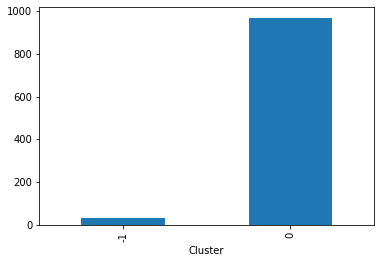

In [520]:
#Mengelompokan berdasarkan cluster
clustered_data3.groupby('Cluster').size().plot.bar()

In [521]:
#Mengelompokan berdasarkan cluster
clustered_data3.groupby('Cluster').mean().round(0)

,Age,Pay off power
Cluster,,
-1,49.0,541.0
0,35.0,156.0


## Kesimpulan

Text(0.5, 1.0, 'DBSCAN Cluster')

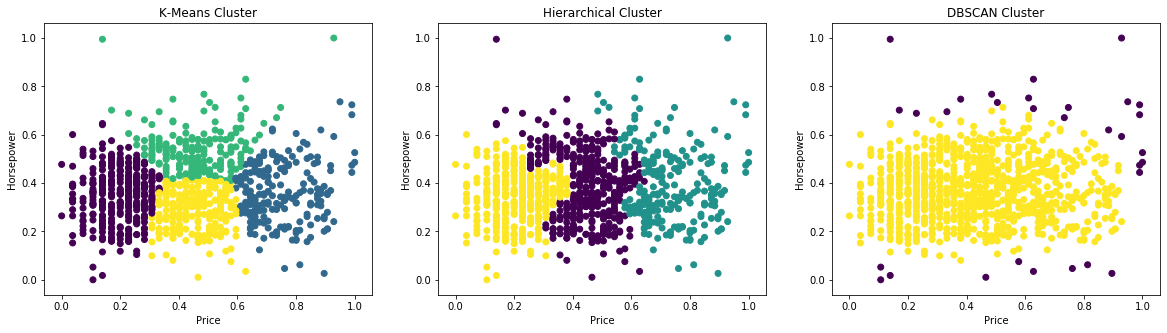

In [522]:
#Visualisasi 3 metode
f = plt.figure(figsize=(20,5))

f.add_subplot(1,3,1)
x = data_fix[:,0]
y = data_fix[:,1]
plt.scatter(x, y, c=km.labels_)
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('K-Means Cluster')

f.add_subplot(1,3,2)
x = data_fix[:,0]
y = data_fix[:,1]
plt.scatter(x, y, c=hc.labels_)
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('Hierarchical Cluster')

f.add_subplot(1,3,3)
x = data_fix[:,0]
y = data_fix[:,1]
plt.scatter(x, y, c=label)
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('DBSCAN Cluster')

-------------------------------------------------------------------------------------------------------------------------------

- Dari ketiga metode yang telah dilakukan untuk clustering dan customer segmentation German Credit Risk, saya memutuskan untuk memilih metode <b>K-Means</b>.
<br>
<br>
- Saya memilih metode K-Means karena metode ini sangat baik untuk menclustering data yang densitynya itu sangat padat dan terpusat sedangkan data kita memiliki karakteristik seperti itu sehingga metode K-Means sangat cocok. [Source Link](https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages)
- Dari 3 gambar diatas, dapat dilihat bahwa K-Means clustering memisahkan data dengan sangat baik dan jelas. setiap cluster seperti memiliki border dengan cluster lain. sehingga hal ini memudahkan dari segi readability jika dibandingkan dengan metode lain.
- Lalu untuk hasil segmentasi, metode K-Means memberikan segmentasi yang lebih masuk akal jika dibandingkan yang lain, yaitu 4 kluster dengan memiliki perbedaan yang signifikan berdasarkan rata-rata dari featuresnya. sedangkan untuk yang Hierarchical mendapatkan 3 kluster namun untuk nilai rata-rata dari Pay Off Powernya perbedaan 1 kluster dengan kluster lainya tidak terlalu signifikan.

Dengan melihat distrbusi clusternya, bisa dikatakan bahwa data ini kurang cocok dengan model DBSCAN karena:
1. DBSCAN itu bekerja baik untuk memisahkan density yang padat dengan density yang kurang padat.
2. Sedangkan data kita memiliki density yang sangat padat ditengah, sehingga DBSCAN tidak bisa berfungsi dengan baik di data ini.
<br>

[Source Link](https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818)

-------------------------------------------------------------------------------------------------------------------------------

In [523]:
#Recall Our Data
clustered_data.groupby('Cluster').mean().round(0)

,Age,Pay off power
Cluster,,
0,25.0,137.0
1,54.0,150.0
2,36.0,330.0
3,35.0,99.0


- Klasifikasi Age:
    1. 15 <= Age < 30 = Umur Muda
    2. 30 <= Age < 45 = Umur Sedang
    3. Age >= 45 = Umur Tua
- Klasifikasi Pay off power:
    1. 0 <= Pay < 150 = Weak power
    2. 150 <= Pay < 300 = Moderate Power
    3. Pay >= 300 = Strong Power

Dari KMeans dapat diambil insights:
1. Terdapat 4 kluster yaitu kluster 0,1,2, dan 3.
2. Kluster 2 atau merupakan segment <b>'SAFE'</b> merupakan kluster dengan umur rata rata berada di sedang dan rata rata pay off powernya tinggi. Customer seperti ini biasanya para eksekutif muda yang karirnya baru naik daun. Kemungkinan besar cluster ini pasti bisa untuk membayar/melunasi credit.
3. Kluster 1 atau merupakan segment <b>'GOOD'</b> merupakan kluster dengan umur rata rata yang sudah tua dengan rata rata pay off power yang moderate. Biasanya customer seperti ini merupakan pekerja kantor yang hampir pensiun.
4. Kluster 0 atau merupakan segment <b>'MODERATE'</b> merupakan kluster yang masih bisa dihandalkan untuk membayar credit karena rata rata umur masih muda dan rata rata pay off power yang moderate.
5. Kluster 3 atau merupakan segment <b>'RISK'</b> merupakan kluster yang paling berbahaya karena rata rata umur mereka sedang namun memiliki rata rata pay off power yang weak.

### Penjelasan Lebih Lanjut Terkait Setiap Kluster

In [547]:
#Untuk yang termasuk kluster 0 atau 'Moderate'
grup0 = data.loc[clustered_data['Cluster']==0,:]

In [535]:
grup0.describe(include='number')

,Age,Job,Credit amount,Duration
count,352.000000,352.000000,352.000000,352.000000
mean,25.082386,1.838068,2899.704545,20.968750
std,2.531067,0.564298,2491.481226,12.134415
min,19.000000,0.000000,276.000000,4.000000
25%,23.000000,2.000000,1280.250000,12.000000
50%,25.000000,2.000000,2143.500000,18.000000
75%,27.000000,2.000000,3620.750000,24.000000
max,30.000000,3.000000,15672.000000,72.000000


- Untuk numerical data, didapatkan bahwa rata-rata umurnya adalah umur muda, dengan credit amount rata rata 2800 US$ dengan durasi 20 bulan.

In [537]:
grup0.describe(include='object')

,Sex,Housing,Saving accounts,Checking account,Purpose
count,352,352,352,352,352
unique,2,3,4,3,8
top,male,own,little,little,radio/TV
freq,185,242,279,221,114


- Untuk kategorikal data, didapatkan bahwa rata-rata peminjam adalah laki-laki dan memiliki jumlah saving yang little.
- Tujuan credit adalah untuk membeli radio/TV

In [548]:
#Untuk grup yang teramasuk kedalam Cluster 1 atau 'Good'
grup1 = data.loc[clustered_data['Cluster']==1,:]

In [539]:
grup1.describe()

,Age,Job,Credit amount,Duration
count,201.000000,201.000000,201.000000,201.000000
mean,53.641791,1.835821,2940.562189,20.104478
std,7.776956,0.698506,2689.464989,12.243530
min,43.000000,0.000000,338.000000,5.000000
25%,47.000000,1.000000,1258.000000,12.000000
50%,52.000000,2.000000,2012.000000,18.000000
75%,59.000000,2.000000,3578.000000,24.000000
max,75.000000,3.000000,15945.000000,60.000000


- Untuk numerical data, didapatkan bahwa rata-rata umurnya adalah umur tua, dengan credit amount rata rata 2900 US$ dengan durasi 20 bulan.

In [540]:
grup1.describe(include='object')

,Sex,Housing,Saving accounts,Checking account,Purpose
count,201,201,201,201,201
unique,2,3,4,3,8
top,male,own,little,little,car
freq,151,138,160,142,76


- Untuk kategorikal data, didapatkan bahwa rata-rata gendernya adalah laki laki, dengan jumlah savings yang sedikit dan tujuan credit adalah untuk membeli mobil.

In [549]:
#Untuk kluster yang termasuk kedalam cluster 2 atau 'SAFE'
grup2 = data.loc[clustered_data['Cluster']==2,:]

In [542]:
grup2.describe()

,Age,Job,Credit amount,Duration
count,195.000000,195.000000,195.000000,195.000000
mean,36.128205,2.087179,5580.917949,19.246154
std,5.932522,0.744457,3511.643181,12.310875
min,23.000000,0.000000,1050.000000,4.000000
25%,32.000000,2.000000,2853.500000,9.000000
50%,35.000000,2.000000,4611.000000,18.000000
75%,40.000000,3.000000,7699.500000,24.000000
max,68.000000,3.000000,18424.000000,60.000000


- Untuk numerical data, didapatkan bahwa rata-rata umurnya adalah umur sedang, dengan credit amount rata rata 5580 US$ dengan durasi 19 bulan.

In [543]:
grup2.describe(include='object')

,Sex,Housing,Saving accounts,Checking account,Purpose
count,195,195,195,195,195
unique,2,3,4,3,7
top,male,own,little,little,car
freq,161,136,160,132,92


- Untuk kategorikal data, didapatkan bahwa rata-rata gendernya adalah laki laki, dengan jumlah savings yang little.
- tujuan dari credit adalah untuk membeli mobil

In [550]:
#Untuk kluster 3 dan yang termasuk ke dalam 'RISK'
grup3 = data.loc[clustered_data['Cluster']==3,:]

In [545]:
grup3.describe()

,Age,Job,Credit amount,Duration
count,252.000000,252.000000,252.000000,252.000000
mean,35.277778,1.908730,2266.785714,22.730159
std,3.816798,0.634031,1516.181827,11.413568
min,29.000000,0.000000,250.000000,6.000000
25%,32.000000,2.000000,1281.000000,12.000000
50%,35.000000,2.000000,1862.000000,21.000000
75%,38.000000,2.000000,2776.750000,27.000000
max,45.000000,3.000000,7685.000000,60.000000


- Untuk numerical data, didapatkan bahwa rata-rata umurnya adalah umur sedang, dengan credit amount rata rata 2200 US$ dengan durasi 22 bulan.

In [546]:
grup3.describe(include='object')

,Sex,Housing,Saving accounts,Checking account,Purpose
count,252,252,252,252,252
unique,2,3,4,3,8
top,male,own,little,little,car
freq,193,197,187,173,78


- Untuk kategorikal data, didapatkan bahwa rata-rata gender adalah laki-laki, dengan jumlah savings sedikit dan tujuan dari credit adalah sebagian besar untuk membeli mobil.

- Dengan mendapatkan insight dari dataset seperti ini, maka insight satau kesimpulan dari analisa kita akan sangat membantu untuk Business Client yang bergerak di bidang jasa keuangan dan Perbankan. Hal ini karena ketika lembaga keuangan mengetahui tentang segmentasi dari customer mereka, maka lembaga keuangan tersebut bisa melakukan berbagai hal seperti berikut:
    1. Melihat apakah customer yang mengajukan credit layak untuk mendapat pinjaman dari bank atau tidak.
    2. Mengetahui beberapa informasi dari customer yang tidak bisa dilihat dengan kasat mata.
    3. Jika customer layak, maka lembaga keuangan akan tau berapa jumlah pinjaman yang akan dipinjamkan dan lamanya masa pembayaran untuk meminimalisir resiko.
    4. Lembaga keuangan juga akan bisa melakukan pengawasan yang lebih terhadap nasabah yang termasuk kluster 3 atau kluster 'RISK'.
    5. Dengan mengetahui segmentasi dari customer, maka lembaga keuangan juga bisa melakukan promosi atau marketing yang tepat sesuai dengan kebutuhan customer.